In [1]:
import pandas as pd
df = pd.read_csv("cardinality_benchmark.tsv", sep="\t")
df

,precision,bits,exact,hll,hll_multiplicity,mle
0,4,1,99481,18.064531,18.064531,inf
1,4,2,99481,86.144000,86.144000,inf
2,4,3,99481,1378.304000,1378.304000,inf
3,4,4,99481,95687.000000,95687.000000,135385.050
4,4,5,99481,96504.836000,96504.836000,119519.484
...,...,...,...,...,...,...
83995,17,2,99507,99460.800000,99460.800000,106907.970
83996,17,3,99507,99460.800000,99460.800000,98845.260
83997,17,4,99507,99460.800000,99460.800000,98807.445
83998,17,5,99507,99460.800000,99460.800000,98807.445


In [2]:
df["memory"] = 2**df.precision * df.bits
df["label"] = "HLL"

In [3]:
df["squared_error_hll"] = (df.exact - df.hll)**2
df["squared_error_hll_multiplicity"] = (df.exact - df.hll_multiplicity)**2
df["squared_error_mle"] = (df.exact - df.mle)**2
columns = ["squared_error_hll", "squared_error_hll_multiplicity", "squared_error_mle"]
data_hll = df.groupby(["precision", "bits", "memory"])[columns].agg(["mean", "std"])
data_hll = data_hll.reset_index()
data_hll

precision bits  memory squared_error_hll                \
                                       mean           std   
0          4    1      16      9.897153e+09  4.391849e+06   
1          4    2      32      9.883612e+09  4.388844e+06   
2          4    3      48      9.628358e+09  4.331800e+06   
3          4    4      64      5.361818e+08  7.436124e+08   
4          4    5      80      6.274324e+08  1.062292e+09   
..       ...  ...     ...               ...           ...   
79        17    2  262144      5.167839e+04  6.760035e+04   
80        17    3  393216      5.167839e+04  6.760035e+04   
81        17    4  524288      5.167839e+04  6.760035e+04   
82        17    5  655360      5.167839e+04  6.760035e+04   
83        17    6  786432      5.167839e+04  6.760035e+04   

   squared_error_hll_multiplicity               squared_error_mle  \
                             mean           std              mean   
0                    9.897153e+09  4.391849e+06               NaN   
1                    9.883612e+09  4.388844e+06               NaN   
2                    9.628358e+09  4.331800e+06               NaN   
3                    5.361818e+08  7.436124e+08      3.251825e+09   
4                    6.274321e+08  1.062292e+09      1.344820e+09   
..                            ...           ...               ...   
79                   5.167839e+04  6.760035e+04      5.615995e+07   
80                   5.167839e+04  6.760035e+04      3.161673e+05   
81                   5.167839e+04  6.760035e+04      3.576507e+05   
82                   5.167839e+04  6.760035e+04      3.576517e+05   
83                   5.167839e+04  6.760035e+04      3.576517e+05   

                  
             std  
0            NaN  
1            NaN  
2            NaN  
3   6.540341e+09  
4   2.541247e+09  
..           ...  
79  3.748330e+06  
80  2.194104e+05  
81  2.346363e+05  
82  2.346365e+05  
83  2.346365e+05  

[84 rows x 9 columns]

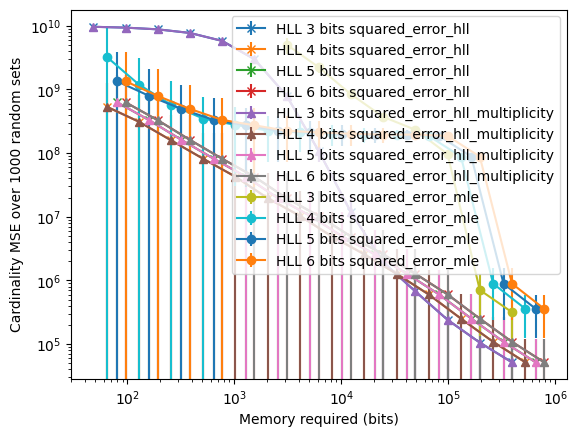

In [4]:
import matplotlib.pyplot as plt

bits_to_skip = (1, 2)

for column in columns:
    for bits in data_hll["bits"].unique():
        if bits in bits_to_skip:
            continue
        filtered = data_hll[data_hll.bits == bits]
        plt.errorbar(
            filtered.memory,
            filtered[column]["mean"],
            filtered[column]["std"],
            marker='^' if "multi" in column else "o" if "mle" in column else "x",
            label=f"HLL {bits} bits {column}"
        )

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Cardinality MSE over 1000 random sets")
plt.xlabel("Memory required (bits)")
plt.show()